In [110]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


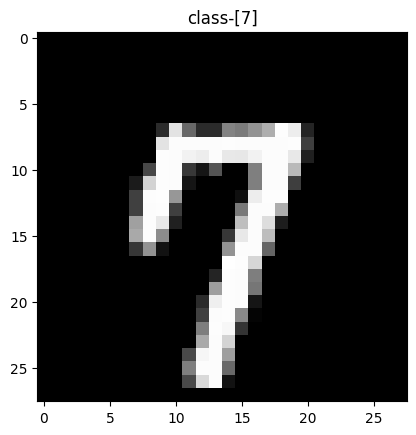

Train image [11125]-th sample
[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0  43 227 104  43  43 131 123 148
   174 253 237  37   0   0   0   0   0   0   0]
  [  0   0   0   0

In [111]:
import numpy as np
import gzip
import matplotlib.pyplot as plt

def read_images(filename):
    """Read MNIST images"""
    with gzip.open(filename, 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        image_count = int.from_bytes(f.read(4), 'big')
        row_count = int.from_bytes(f.read(4), 'big')
        column_count = int.from_bytes(f.read(4), 'big')
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
    return images

def read_labels(filename):
    """Read MNIST labels"""
    with gzip.open(filename, 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        label_count = int.from_bytes(f.read(4), 'big')
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
    return labels

dataset_path = 'C:/Users/parim/Desktop/python/mds_mnist_data_your_name_version_no1/data/'

train_image_filename = dataset_path + 'train-images-idx3-ubyte.gz'
train_label_filename = dataset_path + 'train-labels-idx1-ubyte.gz'

test_image_filename = dataset_path + 't10k-images-idx3-ubyte.gz'
test_label_filename = dataset_path + 't10k-labels-idx1-ubyte.gz'

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}'.format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}'.format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0], size=1)
plt.imshow(train_images[rand_ids, :, :].reshape(28, 28), cmap='gray')  # Reshape for visualization
plt.title('class-' + str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample'.format(rand_ids))
print(train_images[rand_ids, :, :])


In [138]:
def select_samples(images, labels, n_samples_per_class=600):
    """Select n_samples_per_class samples for each class"""
    selected_images = []
    selected_labels = []
    for digit in range(10):
        digit_indices = np.where(labels == digit)[0]
        selected_indices = np.random.choice(digit_indices, n_samples_per_class, replace=False)
        selected_images.extend(images[selected_indices])
        selected_labels.extend(labels[selected_indices])
    return np.array(selected_images), np.array(selected_labels)

def flatten_images(images):
    """Flatten images"""
    return images.reshape(images.shape[0], -1)

In [139]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def pairwise_distances(X):
    n = X.shape[0]
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            distances[i, j] = euclidean_distance(X[i], X[j])
    return distances

In [140]:

def mds(X, n_components=2):
    n = X.shape[0]
    
    # Compute pairwise distances
    distances = pairwise_distances(X)
    
    # Centering matrix
    H = np.eye(n) - np.ones((n, n)) / n
    
    # Double centering
    B = -0.5 * H.dot(distances ** 2).dot(H)
    
    # Eigen decomposition
    eigvals, eigvecs = np.linalg.eigh(B)
    
    # Sort eigenvalues and eigenvectors
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]
    
    # Compute the MDS coordinates
    X_mds = eigvecs[:, :n_components] * np.sqrt(eigvals[:n_components])
    
    return X_mds


In [141]:
X_selected_train, y_selected_train = select_samples(train_images, train_labels, n_samples_per_class=600)
print('Selected train data (X) size: {}, and labels (Y) size: {}'.format(X_selected_train.shape, y_selected_train.shape))

# Flatten the data
X_flattened_train = flatten_images(X_selected_train)

# Apply MDS
X_mds = mds(X_flattened_train, n_components=2)

Selected train data (X) size: (6000, 28, 28), and labels (Y) size: (6000,)


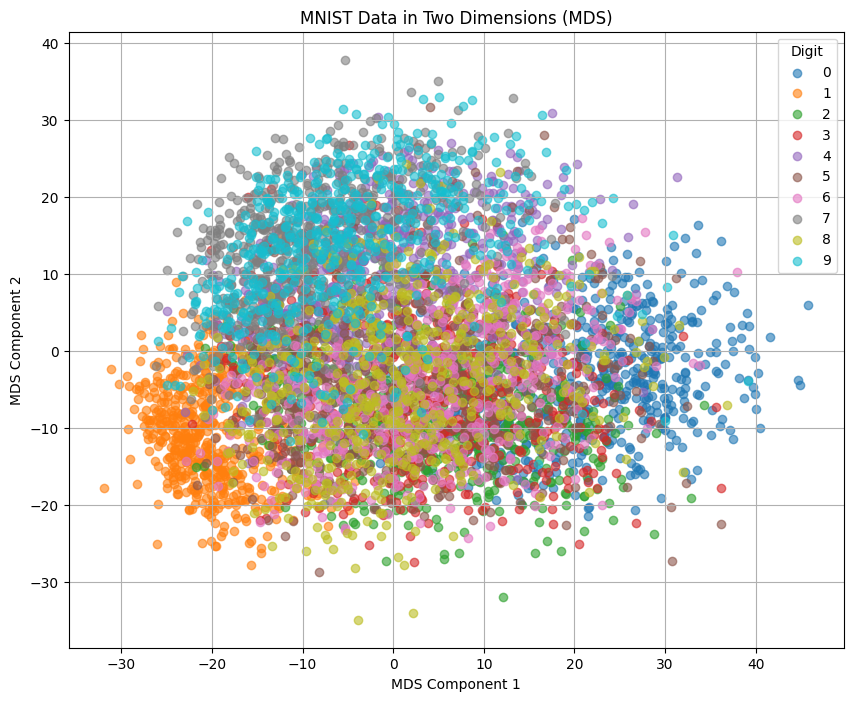

In [142]:
plt.figure(figsize=(10, 8))
for digit in range(10):
    digit_indices = np.where(y_selected_train == digit)[0]
    plt.scatter(X_mds[digit_indices, 0], X_mds[digit_indices, 1], label=str(digit), alpha=0.6)
plt.title('MNIST Data in Two Dimensions (MDS)')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.legend(title='Digit')
plt.grid(True)
plt.show()